In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt, ceil, log2

In [142]:
data = pd.read_csv("std.csv")
data

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [144]:
data.isnull().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

In [145]:
X = data.drop(['GRADE', 'STUDENT ID'], axis=1)
y = data['GRADE']

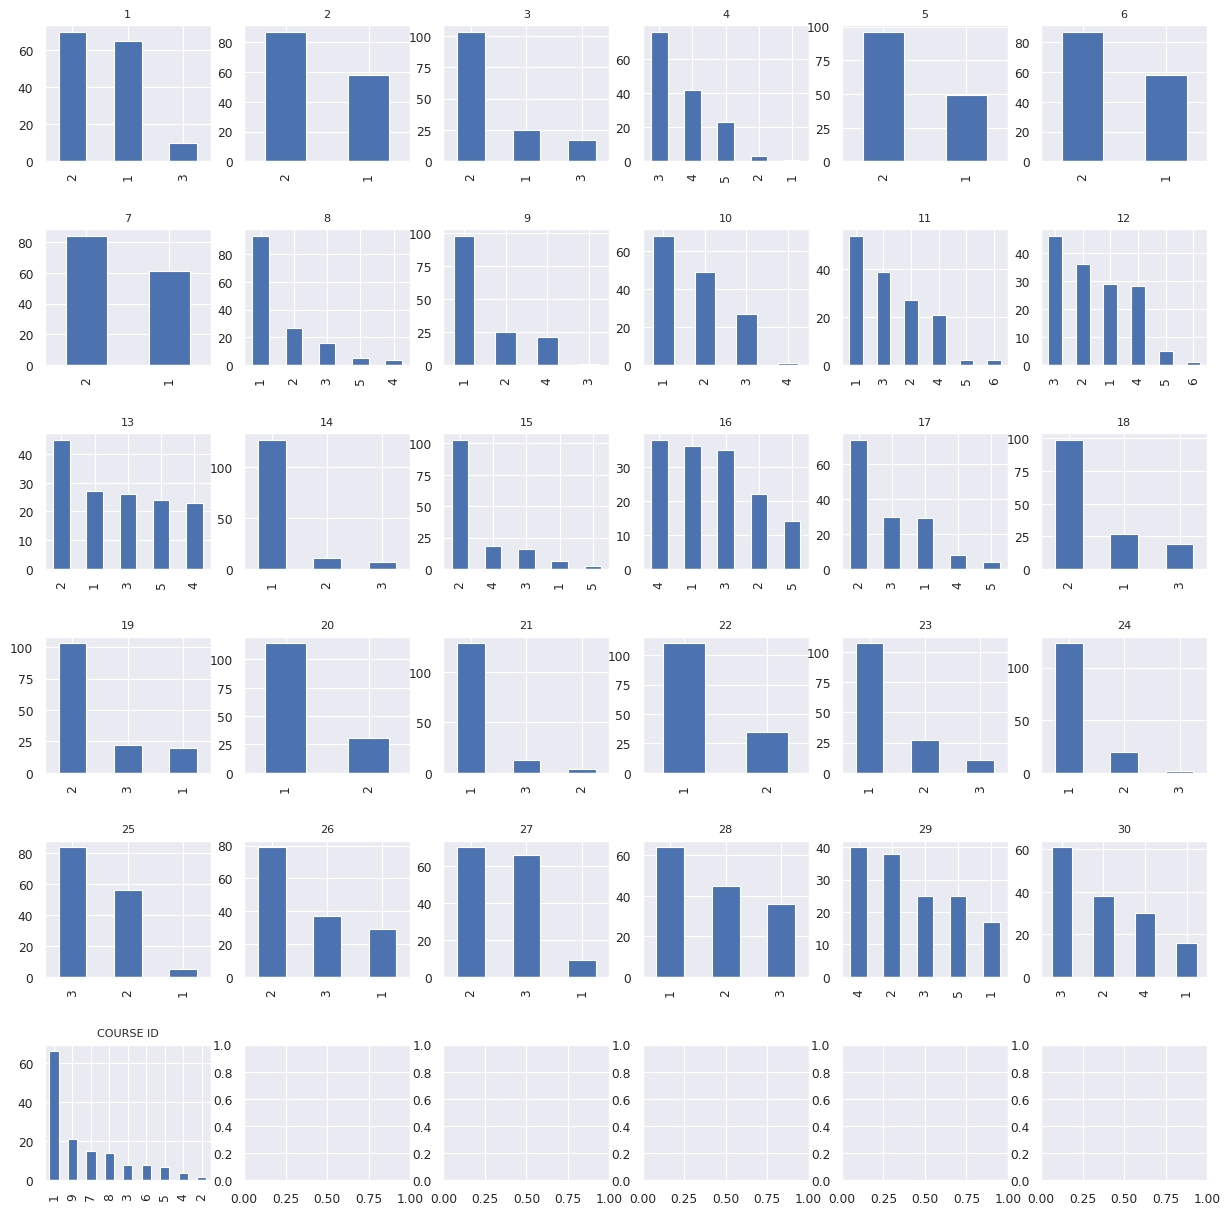

In [146]:
fig, axs = plt.subplots(ceil(sqrt(len(X.columns))), ceil(sqrt(len(X.columns))), figsize=(15, 15), sharex=False, sharey=False, gridspec_kw={'hspace': 0.5})
for ax, col in zip(axs.flatten(), X.columns):
    X[col].value_counts().plot(kind="bar", ax=ax).set_title(col)
plt.show()

<Axes: >

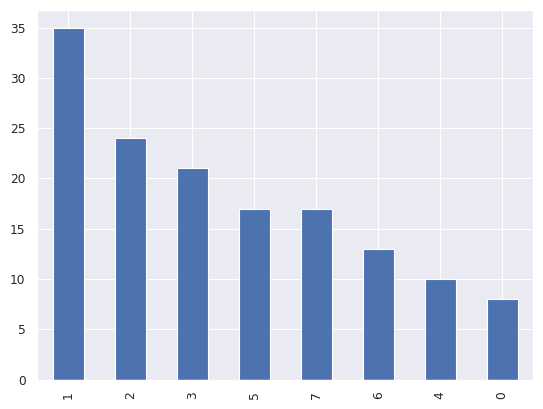

In [147]:
y.value_counts().plot(kind="bar")

<Axes: >

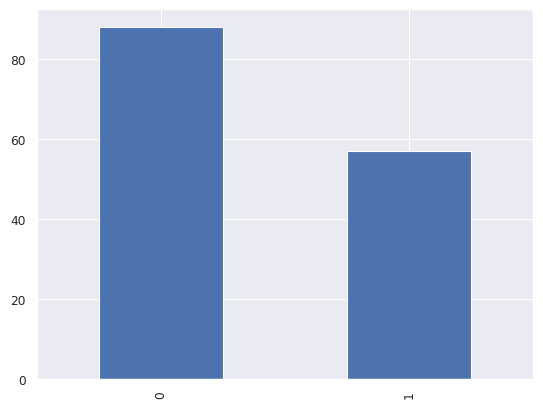

In [148]:
y = pd.Series([1 if i >=4 else 0 for i in y])
y.value_counts().plot(kind="bar")

In [149]:
columns = X.columns
columns = np.random.choice(columns, ceil(sqrt(len(columns))), replace=False)
X = X[columns]
X.head()

,28,27,3,30,13,15
0,2,1,3,1,3,2
1,2,3,3,3,2,2
2,1,1,2,2,2,2
3,1,2,1,2,5,2
4,1,2,1,2,2,2


In [150]:
columns

array(['28', '27', '3', '30', '13', '15'], dtype=object)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

,28,27,3,30,13,15
9,2,2,2,2,3,2
4,1,2,1,2,2,2
26,2,3,2,1,4,2
120,2,3,1,2,2,3
125,1,3,2,3,5,2
...,...,...,...,...,...,...
71,3,3,3,2,5,2
106,1,2,2,4,1,2
14,1,2,2,4,2,4
92,3,3,2,2,4,3


In [152]:
class Node:
  def __init__(self, feature, value):
    self.feature = feature
    self.value = value
  def pred(self, x):
    feature_value = x[self.feature]
    if feature_value not in self.value:
        return None
    return self.value[feature_value].pred(x)
  def pred_proba(self, x):
    feature_value = x[self.feature]
    if feature_value not in self.value:
        return 0, 0
    return self.value[feature_value].pred_proba(x)


In [153]:
class Leaf(Node):
  def __init__(self, leaf_value, proba):
      super().__init__("", {})
      self.leaf_value = leaf_value
      self.proba = proba

  def pred(self, x):
      return self.leaf_value

  def pred_proba(self, x):
      return self.leaf_value, self.proba


In [154]:
class DecisionTree():
  def __init__(self, columns):
      self.columns = columns
      self.root = None

  @staticmethod
  def entropy(y):
    class_n = y.unique()
    res = 0
    for i in class_n:
      res -= (y.value_counts()[i] / len(y)) * log2(y.value_counts()[i] / len(y))
    return res
  def build_node(self, x, y, parent_entropy):
    if len(y.unique()) == 1:
      return Leaf(y.unique()[0], 1)

    max_gain = 0
    gain_info = 0
    max_gain_column = ''

    for column in self.columns:
        features_names = x[column].unique()
        tmp_info = 0

        for feature in features_names:
            feature_weight = x[column].value_counts()[feature] / len(x)
            tmp_info += DecisionTree.entropy(y[x[column] == feature]) * feature_weight

        if parent_entropy - tmp_info > max_gain:
            max_gain = parent_entropy - tmp_info
            gain_info = tmp_info
            max_gain_column = column

    if max_gain_column == '':
        mode = y.mode()[0]
        return Leaf(mode, y.value_counts()[mode] / len(y))

    values = {}

    features_names = x[max_gain_column].unique()
    for feature in features_names:
        values[feature] = self.build_node(x[x[max_gain_column] == feature], y[x[max_gain_column] == feature], gain_info)

    return Node(max_gain_column, values)
  def fit(self, x, y):
    self.root = self.build_node(x[self.columns], y, DecisionTree.entropy(y))
    return self.root
  def pred(self, x):
    return [self.root.pred(i) for i in x[self.columns].to_records()]
  def pred_proba(self, x):
    return [self.root.pred_proba(i) for i in x[self.columns].to_records()]


In [155]:
model = DecisionTree(columns)
model.fit(x_train, y_train)
y_pred = model.pred(x_test)
print(columns)

['28' '27' '3' '30' '13' '15']


In [156]:
def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_test)
accuracy(y_test, y_pred)

0.6206896551724138

In [157]:
import seaborn as sn
def confusion_matrix(pred_y, true_y):
    matrix = np.zeros((2, 2))
    for pred, true in zip(pred_y, true_y):
        pred = 1 if pred == 1 else 0
        true = 1 if true == 1 else 0
        matrix[pred][true] += 1

    return matrix

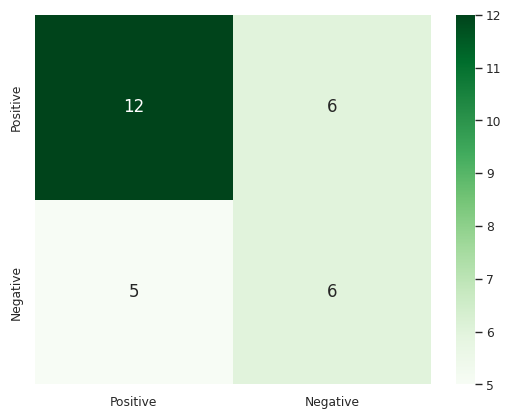

In [158]:
cm_indeces = ['Positive', 'Negative']
df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), index = cm_indeces, columns = cm_indeces)
sn.set_context("paper", rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":5})
sn.heatmap(df_cm, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [159]:
def accuracy(conf):
    return (conf[1][1] + conf[0][0]) / (conf[1][1] + conf[0][0] + conf[1][0] + conf[0][1])
def precision(conf):
    return conf[1][1] / (conf[1][1] + conf[1][0])
def recall(conf):
    return conf[1][1] / (conf[1][1] + conf[0][1])
def tpr(conf):
    return recall(conf)
def fpr(conf):
    return conf[1][0] / (conf[1][0] + conf[0][0])
print("Accuracy: ", accuracy(confusion_matrix(y_pred, y_test)))
print("Precision: ", precision(confusion_matrix(y_pred, y_test)))
print("Recall: ", recall(confusion_matrix(y_pred, y_test)))

Accuracy:  0.6206896551724138
Precision:  0.5454545454545454
Recall:  0.5


In [160]:
y_pred_proba = model.pred_proba(x_test)

In [161]:
def confusion_matrix_proba(y_pred_proba, true_y, threshold):
    matrix = np.zeros((2, 2))
    for pred_prob, true in zip(y_pred_proba, true_y):
        pred = 1 if pred_prob >= threshold else 0
        true = 1 if true == 1 else 0
        matrix[pred][true] += 1

    return matrix

In [162]:
def probas(y_pred_proba):
  return [prob if pred == 1 else 1 - prob for pred, prob in y_pred_proba]

In [163]:
import seaborn as sns
def auc_roc_plot(y_pred_proba):
    sns.set(font_scale=1)
    sns.set_color_codes("muted")
    plt.figure(figsize=(8, 8))
    tpr_arr = []
    fpr_arr = []
    for th in np.arange(1, 0, -0.01):
        conf = confusion_matrix_proba(probas(y_pred_proba), y_test, th)
        tpr_arr.append(tpr(conf))
        fpr_arr.append(fpr(conf))
    display(pd.DataFrame({'tpr': tpr_arr, 'fpr': fpr_arr}))

    plt.plot([0] + fpr_arr + [1], [0] + tpr_arr + [1], lw=2, label='ROC')
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'k--', label='Baseline')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

,tpr,fpr
0,0.500000,0.294118
1,0.500000,0.294118
2,0.500000,0.294118
3,0.500000,0.294118
4,0.500000,0.294118
...,...,...
95,0.833333,0.647059
96,0.833333,0.647059
97,0.833333,0.647059
98,0.833333,0.647059


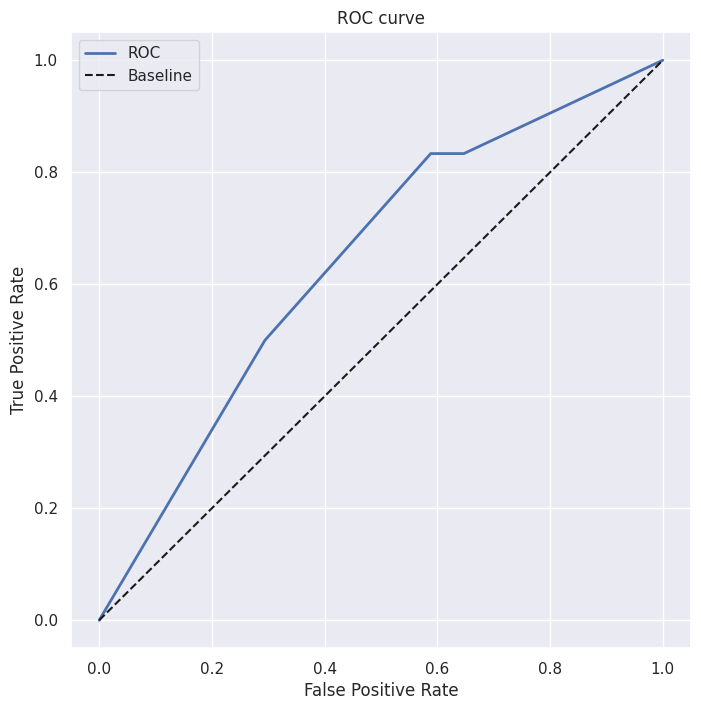

In [164]:
auc_roc_plot(y_pred_proba)

In [165]:
def auc_pr_plot(y_pred_proba):
  p = []
  r = []

  for th in np.arange(0, 1, 0.01):
    conf = confusion_matrix_proba(probas(y_pred_proba), y_test, th)
    p.append(precision(conf))
    r.append(recall(conf))

  plt.plot([1] + r + [0], [0] + p + [1], label='PR')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()

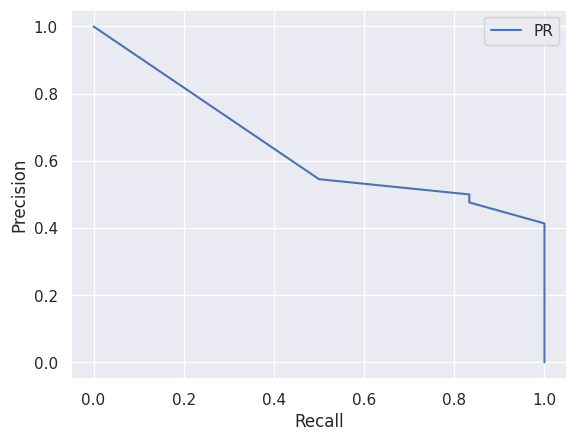

In [166]:
auc_pr_plot(y_pred_proba)